In [5]:
from urllib.parse import unquote
import networkx as nx

G = nx.DiGraph()
with open("articles.tsv") as f:
    for line in f:
        line = line.strip()
        if line == "" or line[0] == "#": continue
        
        G.add_node(unquote(line))
        
with open("links.tsv") as f:
    for line in f:
        line = line.strip()
        if line == "" or line[0] == "#": continue
        
        u, v = line.split()
        u = unquote(u)
        v = unquote(v)
        G.add_edge(u, v)

In [10]:
n_nodes = len(G.nodes)
n_edges = len(G.edges)
density = nx.density(G) # n_edges * 2 / (n_nodes * (n_nodes - 1)))

n_triangles = sum(nx.triangles(G.to_undirected()).values())//3

print("n_nodes", n_nodes)
print("n_edges", n_edges)
print("density", density)
print("n_triangles", n_triangles)

n_nodes 4604
n_edges 119882
density 0.0056568894271159615
n_triangles 550545


In [11]:
degree = nx.degree_centrality(G)
indegree = nx.in_degree_centrality(G)
outdegree = nx.out_degree_centrality(G)
betweenness = nx.betweenness_centrality(G, 200) 
closeness = nx.closeness_centrality(G)
clustering = nx.clustering(G)
triangles = nx.triangles(G.to_undirected())
pagerank = nx.pagerank(G)

In [15]:
print("Degree Rank")
for line in sorted(degree.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)
    
print("PageRank Rank")
for line in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)  
    
print("Closeness Rank")
for line in sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)  

Degree Rank
('United_States', 0.40082554855529)
('United_Kingdom', 0.24766456658700847)
('Europe', 0.23723658483597654)
('France', 0.2268086030849446)
('England', 0.2005213990875516)
('Germany', 0.19813165326960677)
('World_War_II', 0.18900716923745384)
('English_language', 0.15555072778622636)
('India', 0.1503367369107104)
('Africa', 0.1496849880512709)
PageRank Rank
('United_States', 0.00956180652731311)
('France', 0.0064200413810133585)
('Europe', 0.006337014005458885)
('United_Kingdom', 0.006232394913963077)
('English_language', 0.004862980440047761)
('Germany', 0.00482224267836269)
('World_War_II', 0.0047226367934437305)
('England', 0.0044723357530703466)
('Latin', 0.004422148441338466)
('India', 0.004033922521194668)
Closeness Rank
('United_States', 0.5888144495179611)
('Europe', 0.5413350441257859)
('United_Kingdom', 0.5400542324751866)
('France', 0.5383982105334064)
('Germany', 0.5229184910782076)
('World_War_II', 0.5220812473825197)
('Latin', 0.5121245711367234)
('English_lang

In [17]:
import matplotlib.pyplot as plt

nodes = G.nodes

deg_arr = [degree[node] for node in nodes]
indeg_arr = [indegree[node] for node in nodes]
outdeg_arr = [outdegree[node] for node in nodes]
bw_arr = [betweenness[node] for node in nodes]
cl_arr = [closeness[node] for node in nodes]
pr_arr = [pagerank[node] for node in nodes]
cc_arr = [clustering[node] for node in nodes]
tr_arr = [triangles[node] for node in nodes]



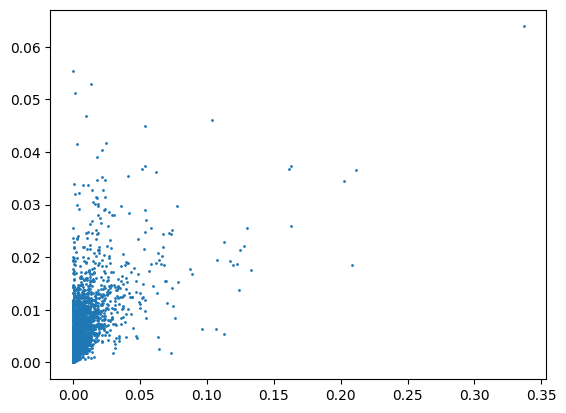

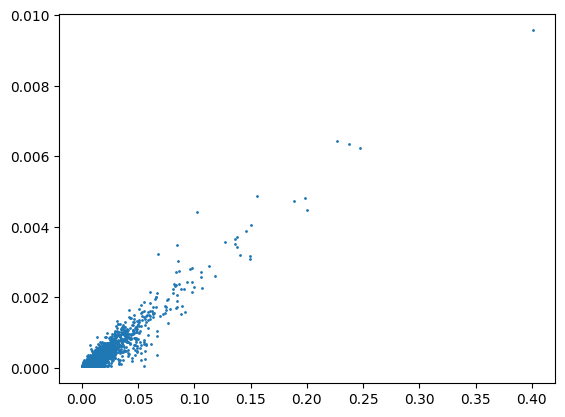

In [20]:
import matplotlib.pyplot as plt

plt.scatter(indeg_arr, outdeg_arr, s=1)
plt.show()

plt.scatter(deg_arr, pr_arr, s=1)
plt.show()

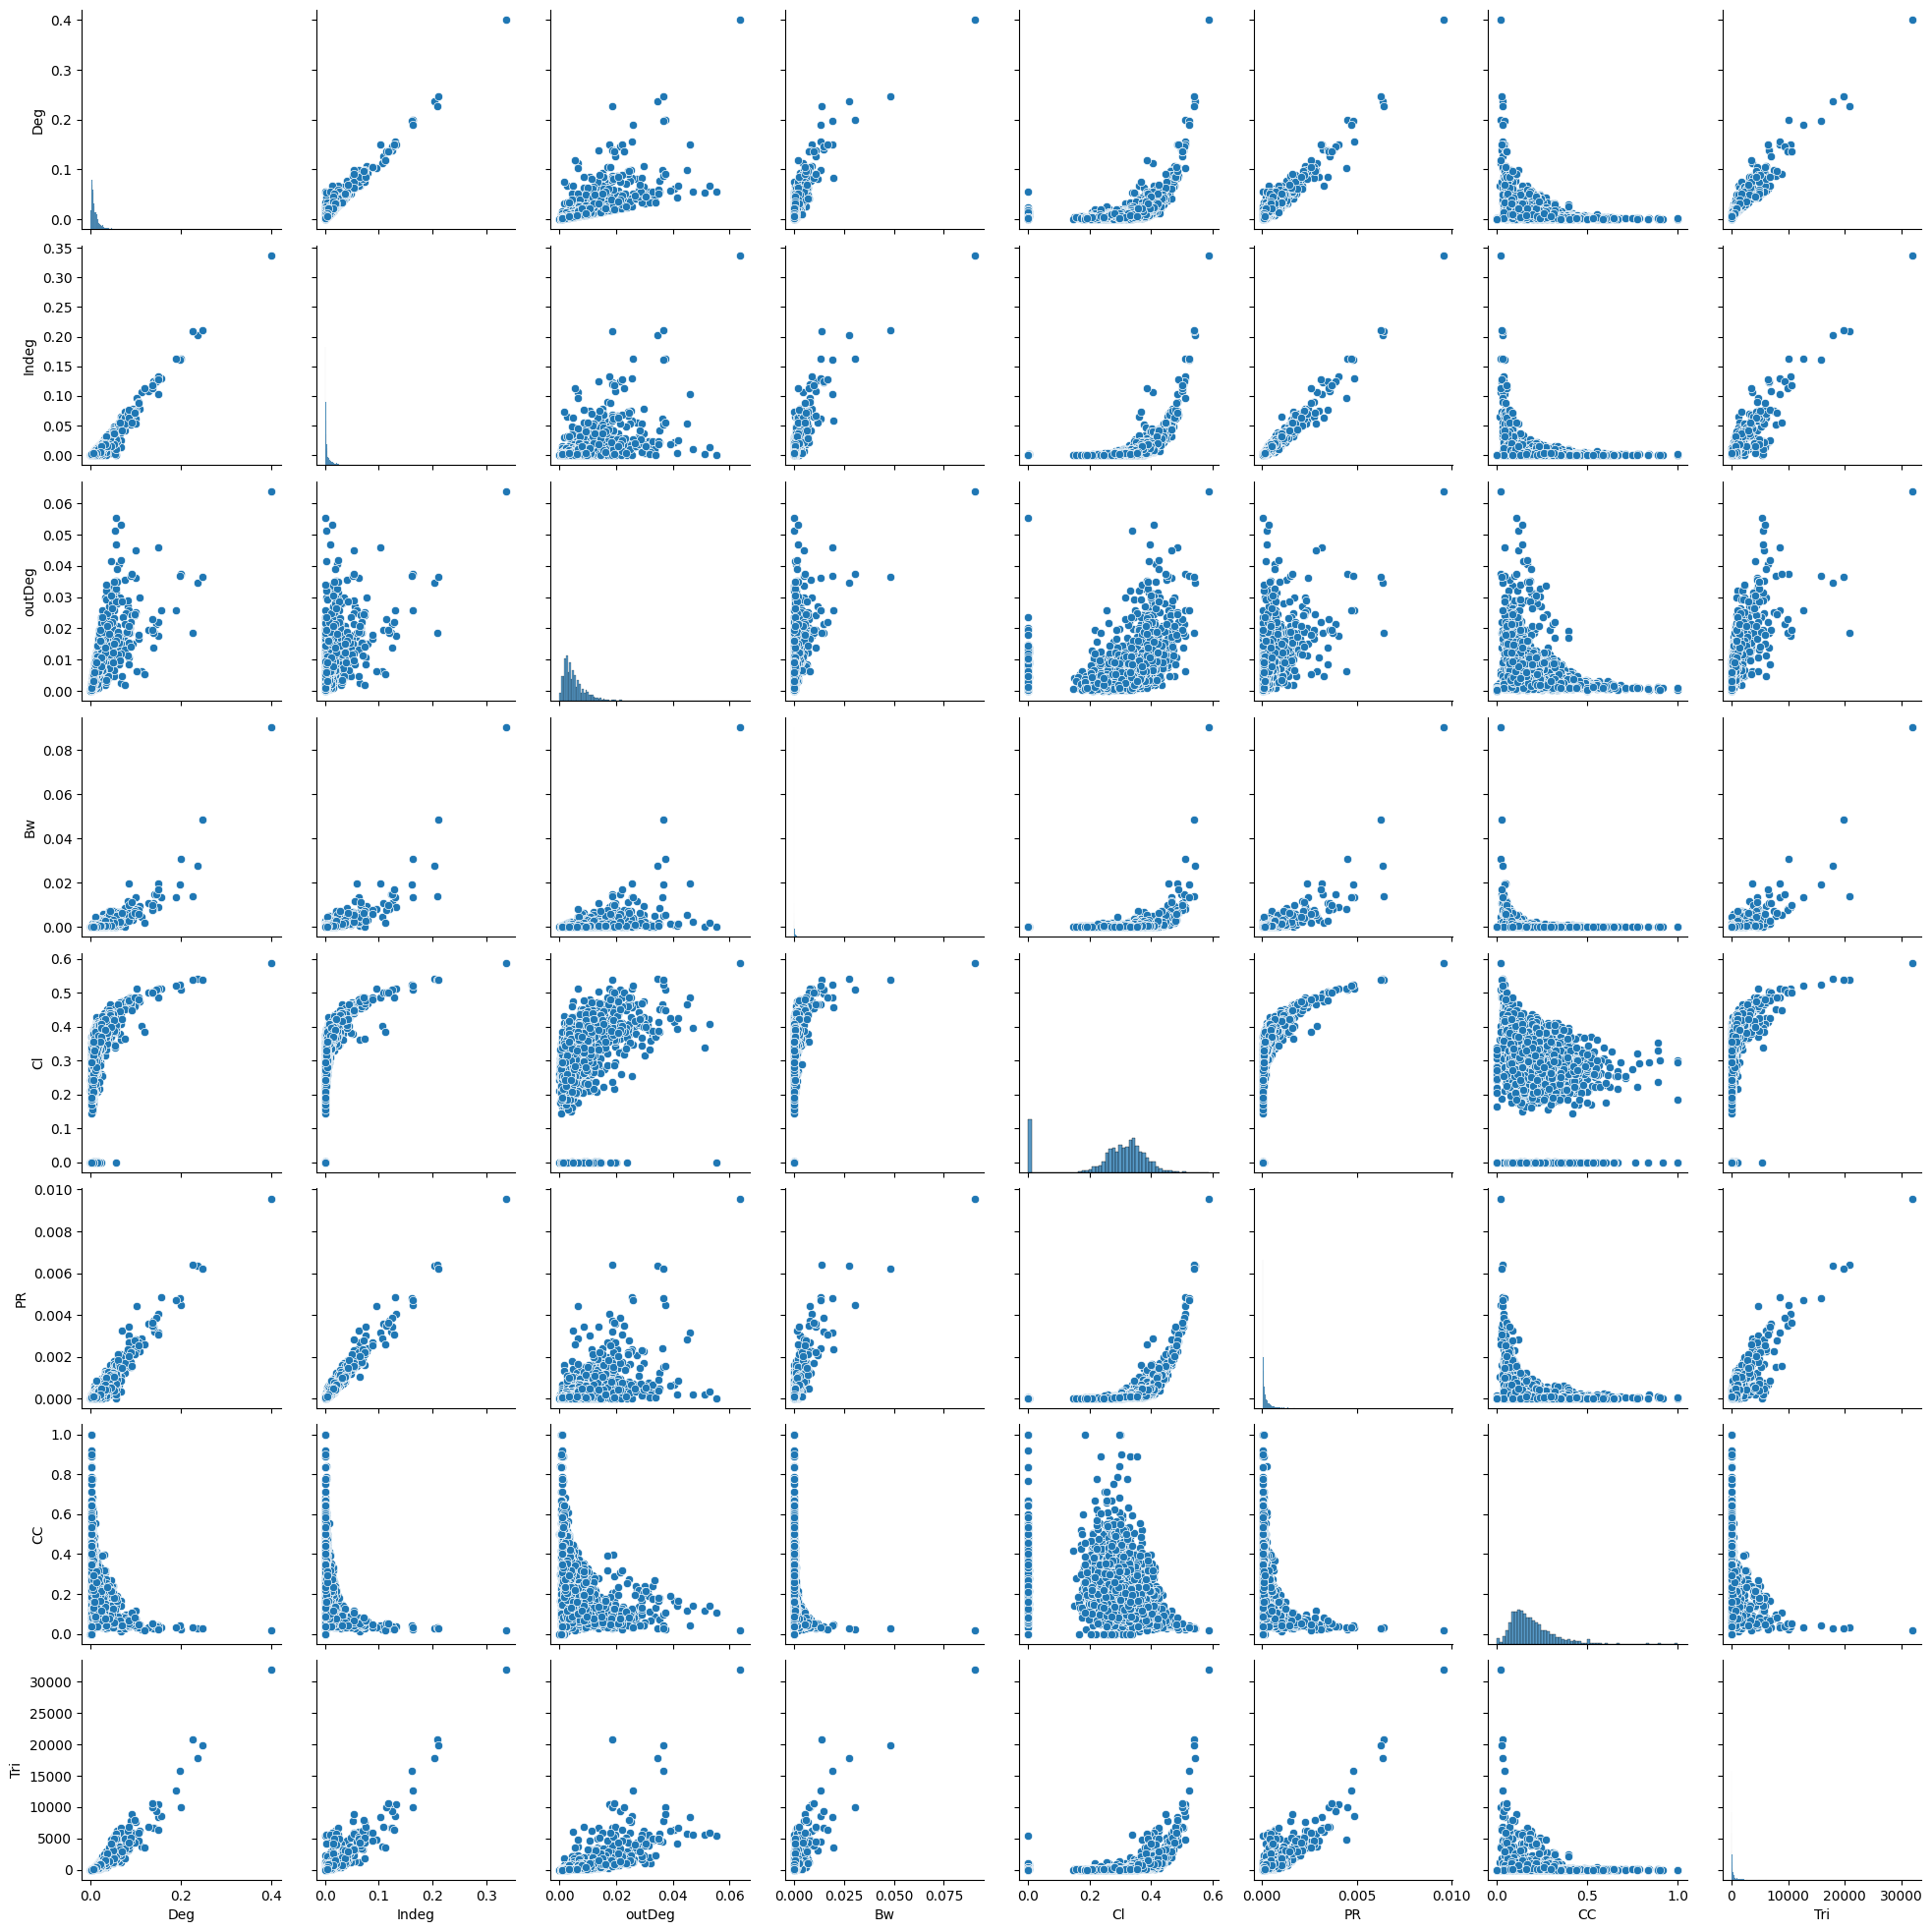

In [22]:
import seaborn as sns
import pandas as pd
import numpy as np

a = np.array([deg_arr, indeg_arr, outdeg_arr, bw_arr, cl_arr, pr_arr, cc_arr, tr_arr]).T
df = pd.DataFrame(a, columns=["Deg", "Indeg", "outDeg", "Bw", "Cl", "PR", "CC", "Tri"])

sns.pairplot(df)
plt.show()

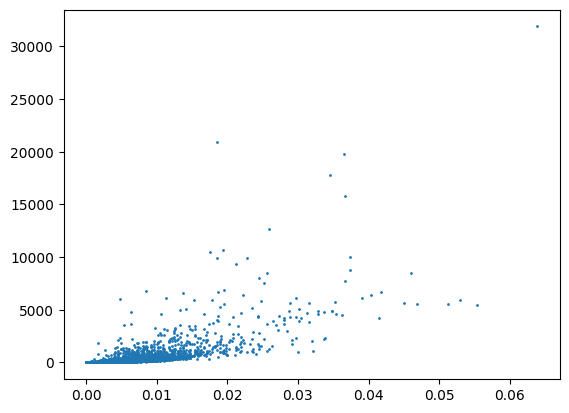

In [ ]:
plt.scatter(outdeg_arr, tr_arr, s=1)
plt.show()



In [32]:
for node in nodes:
    if outdegree[node] > 0.05 and triangles[node] < 10000:
        print(node)


Driving_on_the_left_or_right
List_of_circulating_currencies
List_of_countries


In [33]:
for i, p in enumerate(sorted(pagerank.items(), reverse=True, key=lambda x:x[1])):
    if p[0] == "Driving_on_the_left_or_right":
        print(i, p)

4258 ('Driving_on_the_left_or_right', 3.269755596654361e-05)
